In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
'''
  Title: Titanic Exploratory Data Analysis
  Name: Rachael Muriuki
  Date: 1 June 2025
  Description: Comprehensive EDA on the Titanic dataset. From profiling the dataset and examining its structure, 
  conducting analysis,outlier detection methods and using appropriate handling strategies.

'''

'\n  Title: Titanic Exploratory Data Analysis\n  Name: Rachael Muriuki\n  Date: 1 June 2025\n  Description: Comprehensive EDA on the Titanic dataset. From profiling the dataset and examining its structure, \n  conducting analysis,outlier detection methods and using appropriate handling strategies.\n\n'

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings 

#Set plotting styles and suppress warnings
sns.set_theme(style='whitegrid')
warnings.filterwarnings("ignore")

In [4]:
#loading titanic dataset
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test= pd.read_csv("/kaggle/input/titanic/test.csv")
gender = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

#Use 'train' for EDA
df = train.copy()


In [5]:
#Preview dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Shape 
print("Shape of dataset:", df.shape)

#Data types and non-null counts
print("\nInfo:")
print(df.info())

#Summary stats
print("\nSummary statistics:")
print(df.describe(include='all'))

#List of columns
print("\nColumns:", df.columns.tolist())

#Unique values per column
print("\nUnique values per column:")
print(df.nunique())

#Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

Shape of dataset: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN        

# 2. Checking for missing values

<Axes: >

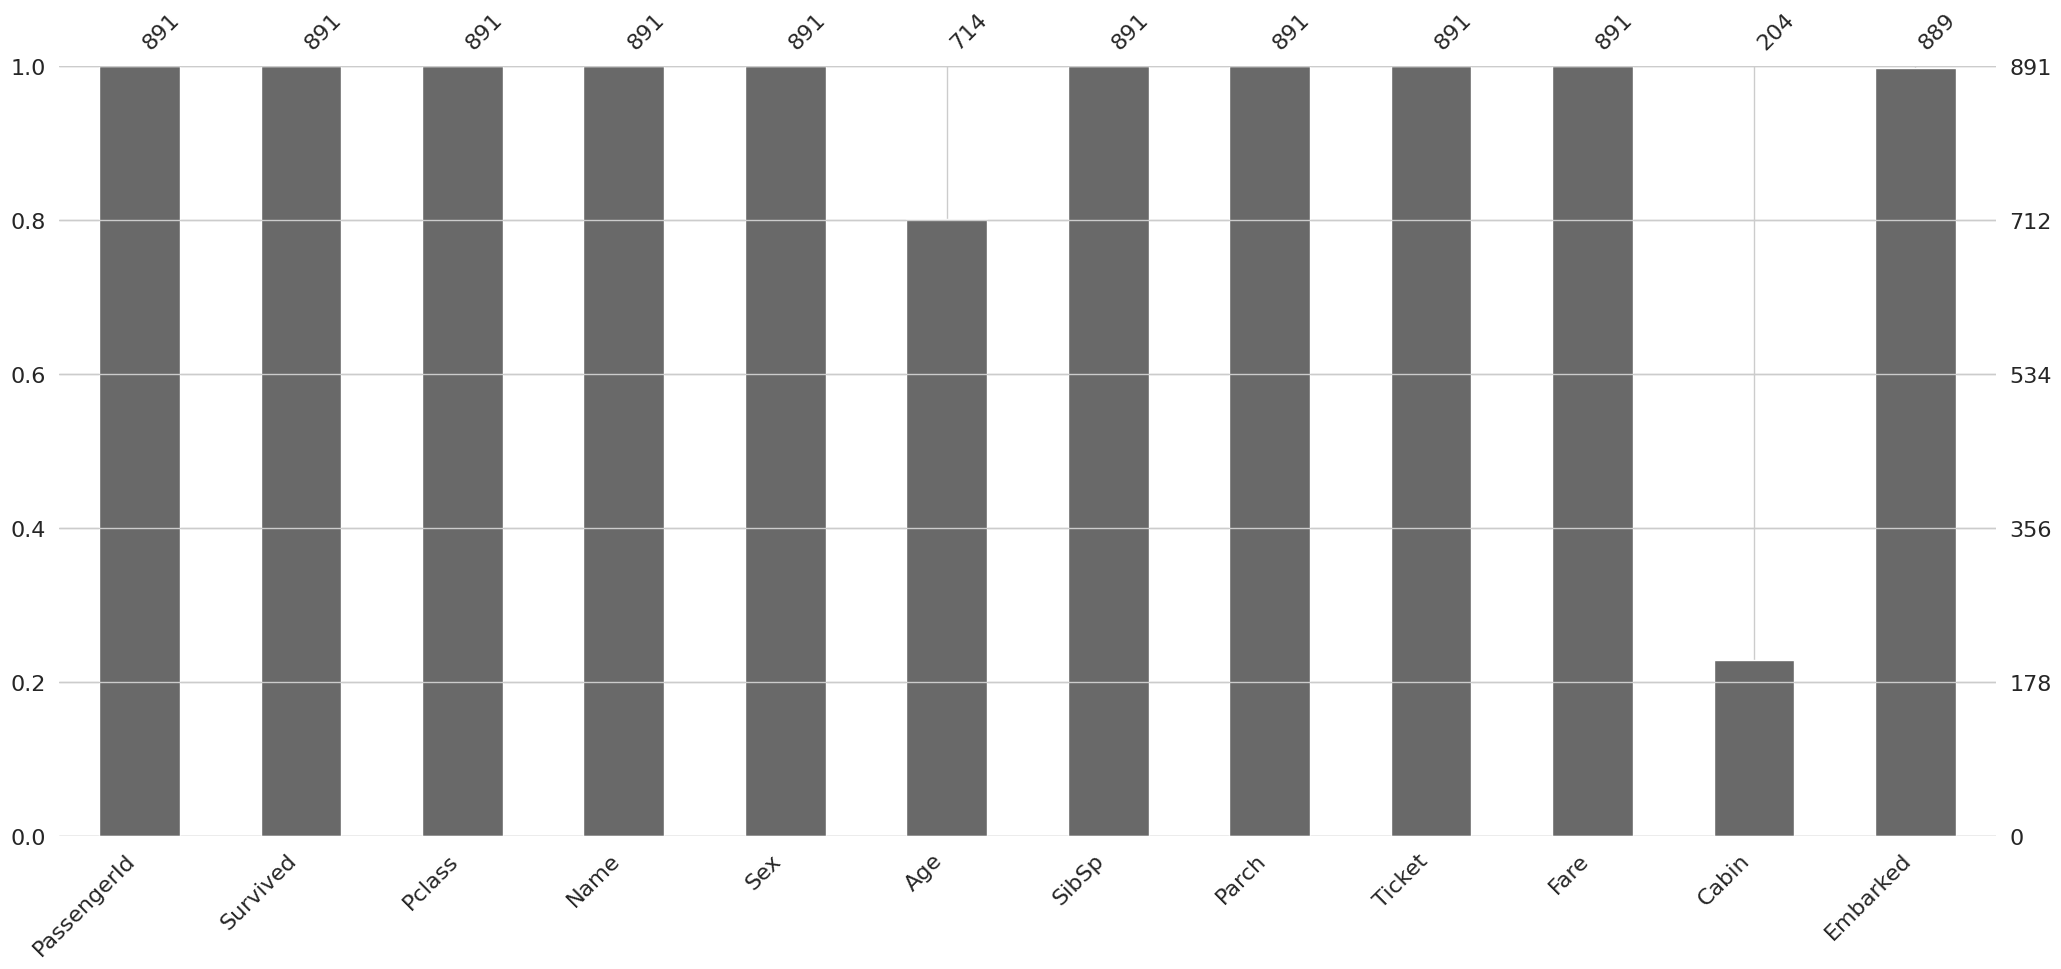

In [7]:
#Visualize missingvalues using missingno
import missingno as msno
msno.bar(df)

# 3. Univariate Analysis
Involves examining one variable at at time to understand
    .The distribution of the varible(normal, skewed..)
    .The central tendency(mean,median,mode)
    .The spread of the data(range, variance, standard deviation)

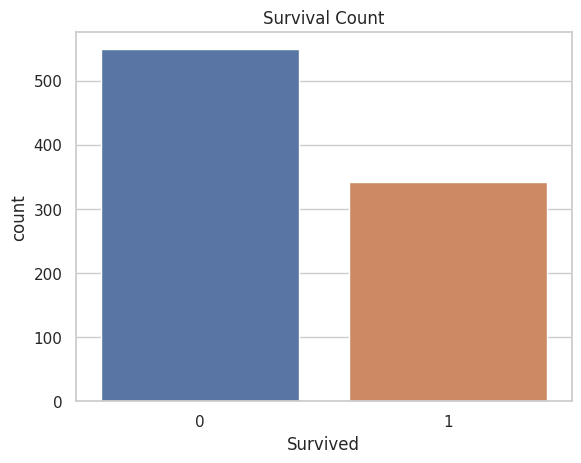

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [8]:
#Survived
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

print(df['Survived'].value_counts(normalize=True))

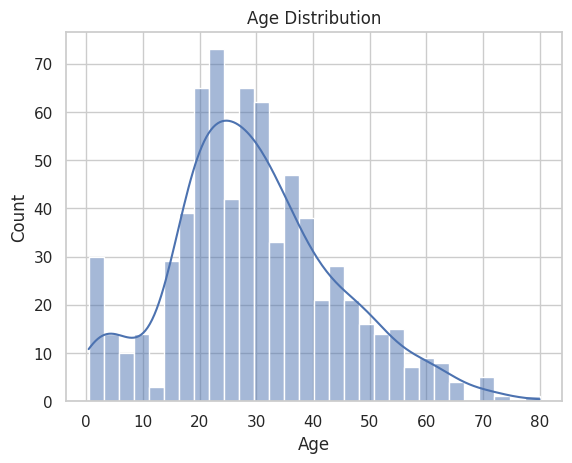

In [9]:
#Distribution of Age
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

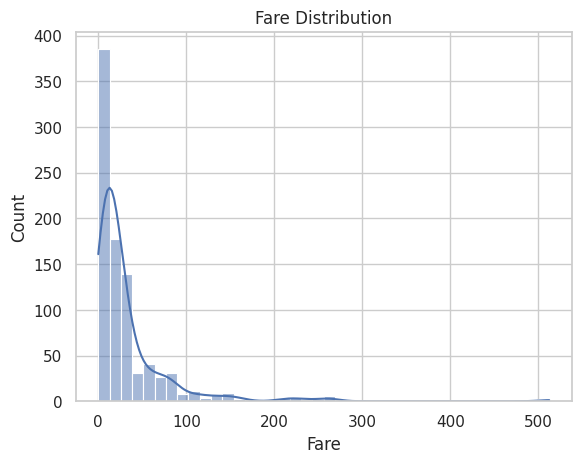

In [10]:
#Fare distribution
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

# 4. Bivariate Analysis
-Involves exploring the relationship between two variables

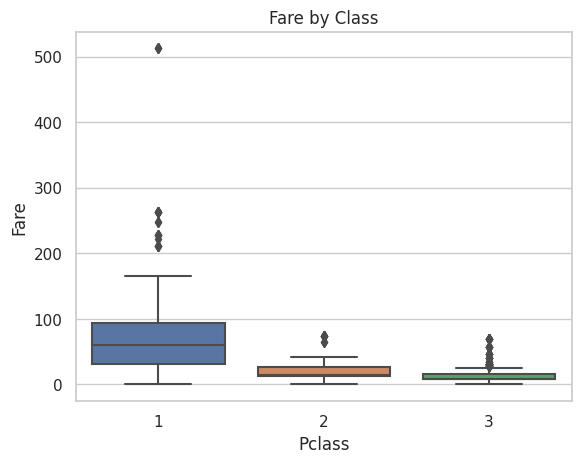

In [11]:
#boxplot-shows the distribution of fare across different passenger classes(Pclass)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Class")
plt.show()

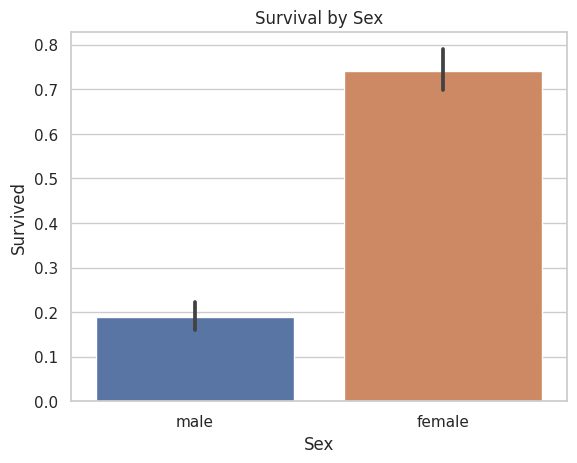

In [12]:
#Barplot-compares average survival rate between male and female passengers
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival by Sex")
plt.show()

females had higher survival rates

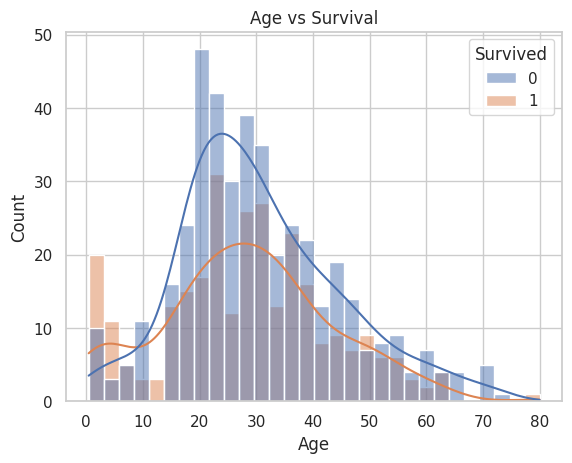

In [13]:
#Histogram-helps visualize how age is distributed
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age vs Survival")
plt.show()

Younger people are more likely to survive

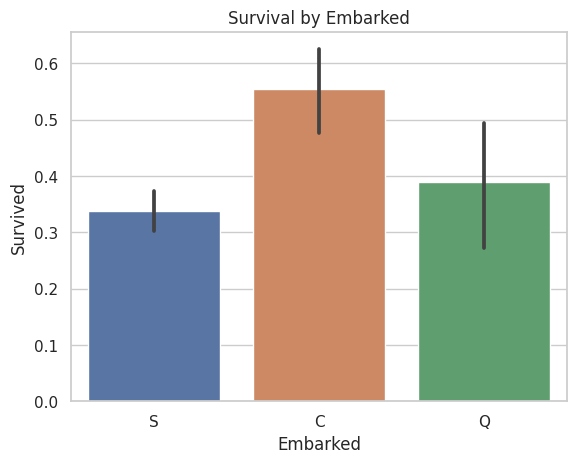

In [14]:
#Barplot-to show survival rate by part of embarkation
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival by Embarked")
plt.show()

# 5. Multivariate Analysis
-Involves exploring relationships between three or more variables simultaneously.

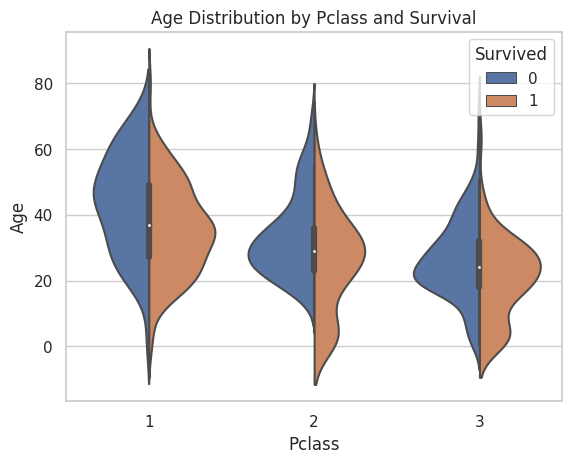

In [15]:
#Violin plot-shows age distribution across different classes and survival status
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title("Age Distribution by Pclass and Survival")
plt.show()

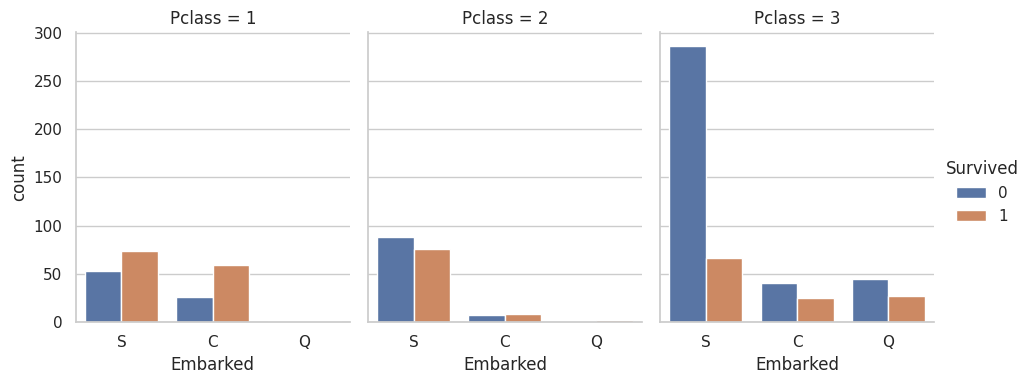

In [16]:
#Faceted countplot-showing survival counts by embarked for each Pclass
sns.catplot(x="Embarked", hue="Survived", col="Pclass",
            data=df, kind="count", height=4, aspect=0.8)
plt.show()

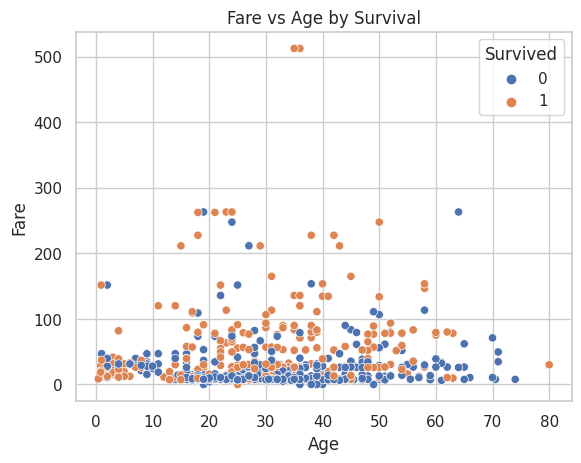

In [17]:
#Scatter plot to explore relationship between  age and fare, colored by survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Fare vs Age by Survival")
plt.show()

# 7. Outlier Detection and handling
-Outliers-data points that differ from the rest of the data

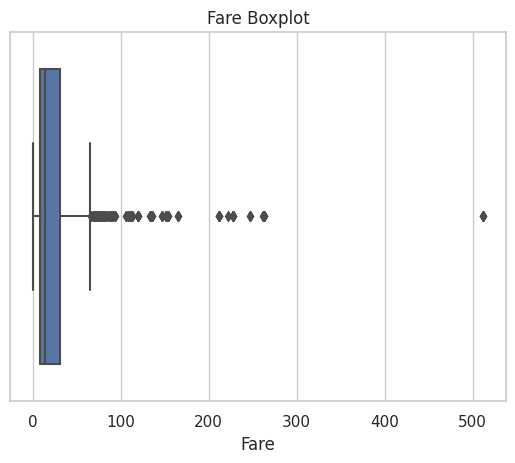

In [18]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot")
plt.show()

# Optionally remove outliers for modeling
%config HistoryManager.enabled = False
q_hi = df['Fare'].quantile(0.99)
df_cleaned = df[df['Fare'] < q_hi]

# 8. Target Variable Exploration
The target variable (Survived) in the Titanic dataset shows whether a passenger survived (1) or did not survive (0). 

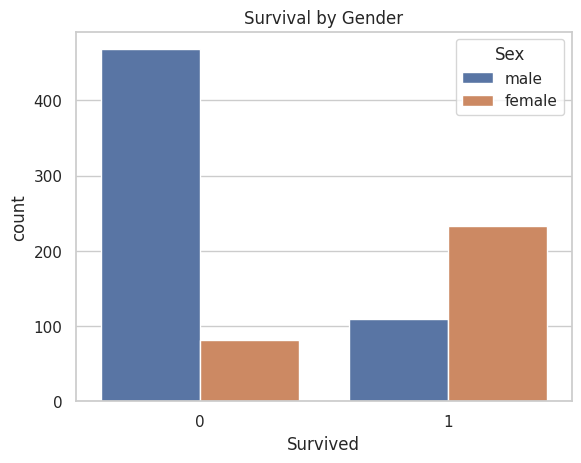

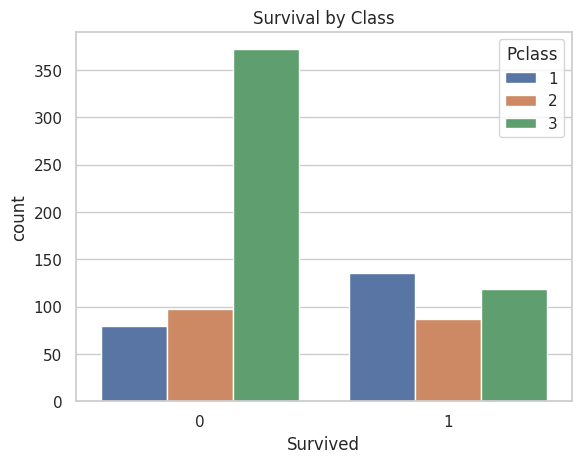

In [19]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Class")
plt.show()